<a href="https://colab.research.google.com/github/LizzetClifton/MathApp/blob/master/SUM%2BMIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUM+MIT

This notebook contains the code for uploading the model and using it with your own equation.

## Uploading the Convolutional Neural Network

In [0]:
# Import all necessary packages
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from sklearn.datasets import load_files
import matplotlib.pyplot as plt 
import pandas as pd
import cv2
import math
import imageio
import numpy as np
import os 
from keras.preprocessing.image import img_to_array
from PIL import Image, ImageOps
import glob
import re
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
# read in clean datasets
train_math = pd.read_csv('inverted_df.csv')
test_math = pd.read_csv('inverted_test_df.csv')

In [0]:
# Function to turn df into tensorflow dataset
def tfDataset(math_dataset):
  tf.enable_eager_execution()

  # making a new list for columns so that they can be ints
  # and the target can be a string
  new_list = list(range(784))
  new_list.append('Target')

  # Used to be train symbols
  math_dataset.columns = new_list
  features = list(range(784))
  
  # Create tf training dataset
  dataset = (
      tf.data.Dataset.from_tensor_slices(
          (
              tf.cast(math_dataset[features].values, tf.float32),
              tf.cast(math_dataset['Target'].values, tf.int32)
          )
      )
  )

  return dataset

In [0]:
# Turn train and test dataframes into tf datasets
training_dataset = tfDataset(train_math)
testing_dataset = tfDataset(test_math)

In [0]:
# Create the class names
# These are the real class names, not the ones we mapped to numbers
class_names = ['0', '1', '2', '3', '4', '5','6','7','8','9','-','+','times','div']

In [0]:
# Store the number of training and testing examples
num_train_examples = len(train_math)
num_test_examples = len(test_math)

In [0]:
# Function will reshape each element in the tensor
# from [784] array to [28,28,1] array
def reshape(images, labels):
  images = tf.reshape(images, (28,28,1))
  return images, labels

# The map function applies the reshaping function to each element in the train
# and test datasets
training_dataset =  training_dataset.map(reshape)
testing_dataset  =  testing_dataset.map(reshape)

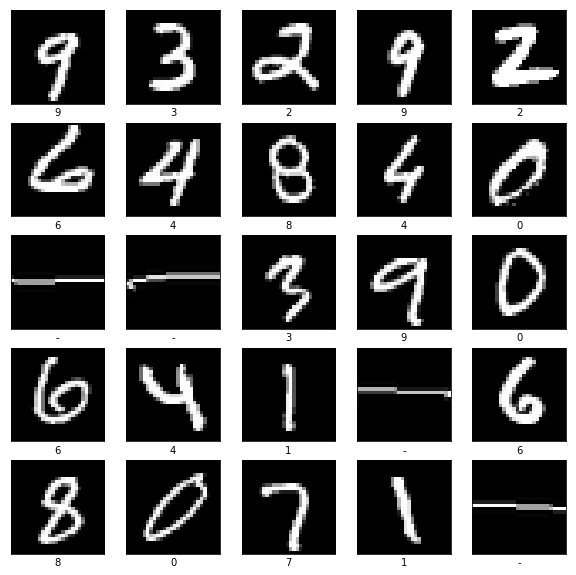

In [0]:
# We will reshape the data and look at the first 25 images in our dataset
plt.figure(figsize=(10,10))
i = 0
for (image, label) in testing_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    plt.xlabel(class_names[label])
    i += 1
plt.show()

### Loading model

You should have saved a cnn.h5 file, which we will upload into the Colab now.

In [0]:
new_model = tf.keras.models.load_model('cnn.h5')
new_model.summary()
BATCH_SIZE = 32
test_dataset = testing_dataset.batch(BATCH_SIZE)
loss, acc = new_model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))
print('Restored model accuracy:', acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_3 (Dense)              (None, 14)               

##  Upload your equation

In [0]:
# Import the modules
import cv2
from google.colab.patches import cv2_imshow
from sklearn.externals import joblib
from skimage.feature import hog

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Take a photo with your webcam
The following code will set up all the necessary tools and create a fuction which will allow colab to take a photo directly from your camera.

In [0]:
# This code comes from a notebook called "📸 Take a photo with your webcam"

from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))

In [0]:
img = take_photo() # click on the image to take photo

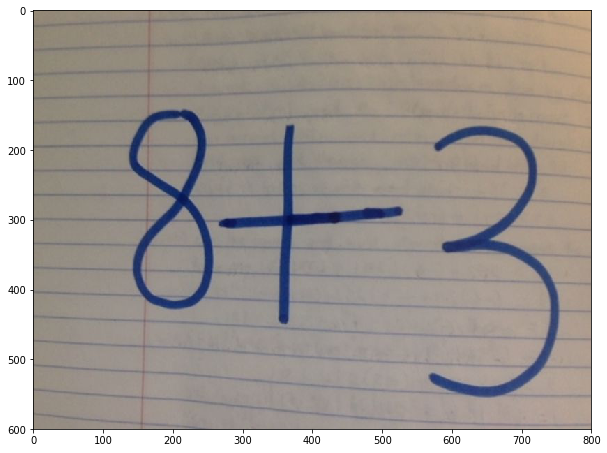

In [0]:
# Display the photo you just took
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [0]:
# We need it in jpg format, so we will store it as such
im = Image.fromarray(img)
im.save("colab_pic.jpg")

In [0]:
# Read in the new jpg
im = cv2.imread("colab_pic.jpg")

In [0]:
# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_blur = cv2.GaussianBlur(im_gray, (5, 5), 0)

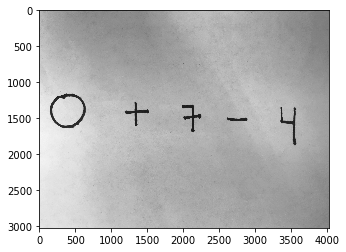

In [0]:
# Show the image
plt.imshow(im_blur, cmap="gray")

In [0]:
# Calculating optimal threshold
median_array = image.img_to_array(im_blur)
median_array = median_array.ravel()
median = np.median(median_array)
median_third = median*0.66

In [0]:
# Threshold the image
ret, im_th = cv2.threshold(im_gray, median_third, 255, cv2.THRESH_BINARY_INV)

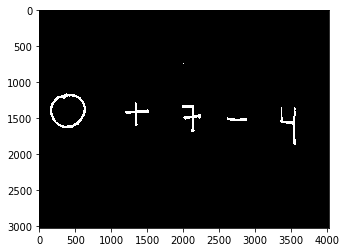

In [0]:
# Show the thresholded image
plt.imshow(im_th, cmap="gray")

In [0]:
# Find contours in the image
image, ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [0]:
# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

In [0]:
# This function will be used to pad and resize each of the digits and symbols
def pad_and_resize(img, size, rgb=(0,0,0)):
  # Obtains max dimension
  wh = img.size
  max_dim = max(wh)
  # Obtains width and height padding
  width_pad, height_pad = max_dim - wh[0], max_dim - wh[1]
  # Obtains left, right, top, bottom padding
  left_pad, top_pad = width_pad // 2, height_pad // 2
  right_pad, bottom_pad = width_pad - left_pad, height_pad - top_pad
  # Pads the image
  padding = (left_pad, top_pad, right_pad, bottom_pad)
  padded_img = ImageOps.expand(img,padding, 0)
  return padded_img.resize(size, Image.ANTIALIAS)

### Getting Predictions

The following cells get the predictions from the bounding boxes. They will remove noise by cropping the images closer to the digit and then adding a border. 

In [0]:
# Function will determine size of border needed based on the area of the bounding box given
def b_size(area):
  border = 0
  if area <= 7000:
    border = 15
  elif area > 7000 and area <= 50000:
    border = 30
  elif area > 50000 and area < 90000:
    border = 50
  else:
    border=75
  return border

prediction: 3


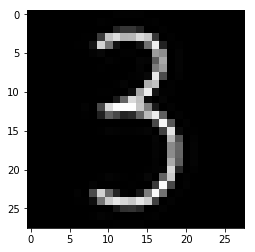

prediction: 11


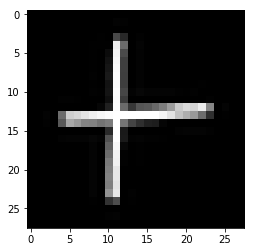

prediction: 8


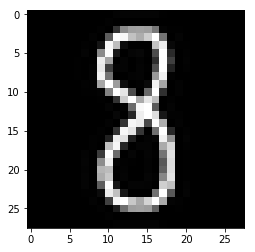

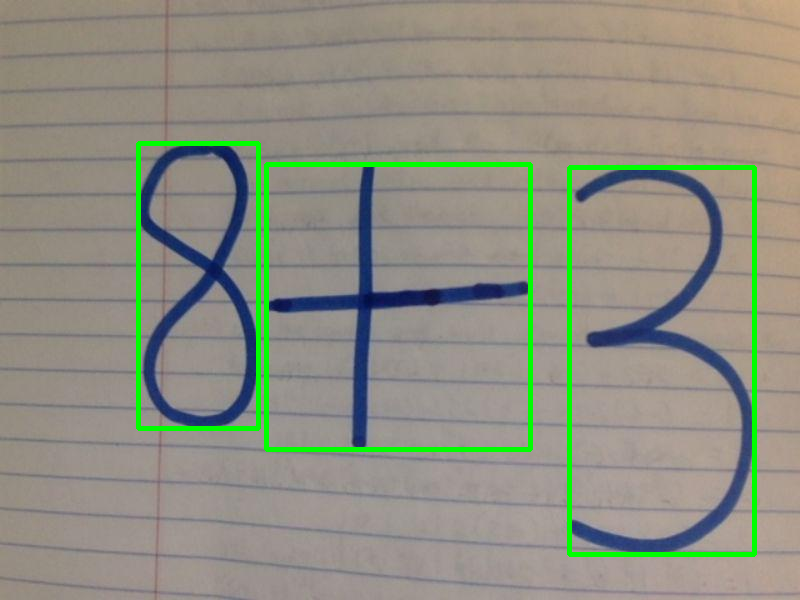

In [0]:
from google.colab.patches import cv2_imshow
from PIL import Image, ImageOps

indiv_boxes = []
count = 0
for rect in rects:
  number = []
  if rect[2] + rect[3] < 80:
    continue
  # rect object gives tuple with x1, y1, height, width
  count = count + 1
  area = rect[2]*rect[3]
  border = b_size(area)

  # Draw the rectangles
  cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
  
  # Cropping each bounding box and storing the image inside into roi
  roi = im_th[int(rect[1]):int(rect[1]+rect[3]), int(rect[0]):int(rect[0]+rect[2])]
  
  # Make number thicker so it becomes easier to recognize
  kernel = np.ones((5,5),np.uint8)
  dilated_im = cv2.dilate(roi,kernel,iterations = 1)
  
  # Making roi into an image so that we can resize
  img_jpg = Image.fromarray(dilated_im)
  
  # Adding a border to the image
  img_with_border = ImageOps.expand(img_jpg,border=border,fill=0)#15
  
  # Setting the size for resizing
  size = (28, 28)
  
  # Padding and resizing the image (which is one rectange)
  new_img = pad_and_resize(img_with_border, size=size)
  
  # Turning the resized image back into an array
  value = img_to_array(new_img)
  
  # print(list(value))
  y = np.expand_dims(value, axis=0)
  
  # Get prediction of number inside bounding box from the image
  predictions = model.predict(y)
  number.append(np.argmax(predictions))
  number.append(rect)
  print('prediction: {}'.format(np.argmax(predictions)))
  #cv2_imshow(roi) # this is actual image
  indiv_boxes.append(number)
  plt.imshow(new_img, cmap = "gray") # this is image with border added
  plt.show()

cv2_imshow(im)

This next part of the code is the sequencing algorithm, which orders the digits adn symbols as they are written on the page.

In [0]:
# Computes shortest eucledian distance from the origin
def distance_from_origin(xi,yi):
    sq1 = xi*xi
    sq2 = yi*yi
    return math.sqrt(sq1 + sq2)
  
# Orders bounding boxes based on location in the image  
def order(predlist):
  rect_to_remove = []
  row_rect_close_to_origin = []
  ordered_list = [] #Output list
  length_of_r_list = len(predlist)

  while len(ordered_list) != length_of_r_list: 
    #Default smallest distance from first value in list
    smallest_dist = distance_from_origin(predlist[0][1][0], predlist[0][1][1])
    row_list = []

    #Find boundary box closet to origin
    for rect in predlist:
      dist = distance_from_origin(rect[1][0], rect[1][1])
      if(dist <= smallest_dist):
        smallest_dist = dist
        close_to_origin = rect

        #Get y value of point 2, All boundary boxes with y value 
        #of point 1 less than check are added next
        check = close_to_origin[1][1] + close_to_origin[1][3]

    #Append to ordered list
    ordered_list.append(close_to_origin)  

    #Remove it from the list
    predlist.remove(close_to_origin)
    
  #Check if other boundary boxes exist in the same row
    for rect in predlist:
      #Check if pt_1_y is less than pt_2_y
      if(rect[1][1] <= check):
        #Append to a row list
        row_list.append(rect)
    #Remove all bondary boxes from r_list that were in row_list
    [predlist.remove(rect) for rect in row_list]
    
    print("row_list",row_list)

    #Now check what values in the row are closet to the origin
    for _ in range(len(row_list)):  
      #Default smallest distance from first value in list
      smallest_dist = distance_from_origin(row_list[0][1][0], row_list[0][1][1])

      for rect in row_list:
        dist = distance_from_origin(rect[1][0], rect[1][1])

        if(dist <= smallest_dist):
          smallest_dist = dist
          row_rect_close_to_origin = rect
      row_list.remove(row_rect_close_to_origin)
      
      #Append box closet to origin
      ordered_list.append(row_rect_close_to_origin)      

  return ordered_list

In [0]:
# the ordered list of bounding boxes (also contains predictions)
checkList = order(indiv_boxes)
print(checkList)

# mathequation will be the array that we turn into str
mathequation = [checkList[i][0] for i in range(len(checkList))]
print(mathequation)

row_list [[3, (569, 167, 185, 387)], [11, (266, 164, 264, 285)]]
[[8, (138, 143, 120, 285)], [11, (266, 164, 264, 285)], [3, (569, 167, 185, 387)]]
[8, 11, 3]


In [0]:
from array import array
import operator

# Turns the equation array into a string
def to_str(arr):
  operation = ""
  for x in arr:
    if x == 10:
      operation += (str(chr(45)))
    elif x == 11:
      operation += (str(chr(43)))
    elif x == 12:
      operation += (str(chr(42)))
    elif x == 13:
      operation += (str(chr(47)))
    else:
      operation += (str(x))

  return operation

# Save the string version of the equation
new_str = to_str(mathequation)

In [0]:
# Check to make sure the divisions are read in correctly
def right_div(some_str):
  if len(some_str) <= 3:
    return some_str
  for i in range(len(some_str)-3):
    if some_str[i:i+3] == '0-0' and some_str[i+3] != '.':
      some_str = some_str.replace('0-0','/')
      
  return some_str

new_str = right_div(new_str)
print('The equation is: {}'.format(new_str))

The equation is: 8+3


In [0]:
# Get solution and output it
solution = eval(new_str)
print('The solution is: {}'.format(solution))

The solution is: 11
